# OCEAN Token Sentiment Analysis Challenge

### Exploratory Data Analysis
By Luca Ordronneau

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import grangercausalitytests

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.templates.default = "seaborn"

pd.set_option('display.max_columns', None)

In [2]:
df_tweet = pd.read_csv('../data/$OCEAN tweets dataset.csv')
df_price = pd.read_csv('../data/OCEAN token price dataset.csv')

# Data Analysis
### 1. Correlation $OCEAN price and the number of tweets containing "$OCEAN"

In [3]:
df_price['Date'] = pd.to_datetime(df_price['Date'])

In [4]:
df_tweet['date'] = pd.to_datetime(df_tweet['date'])
df_tweet_day = df_tweet.groupby([pd.Grouper(key='date', freq='D')], as_index=False).agg({'tweet':'count', 'likes_count':'sum', 'retweets_count':'sum', 'user_id': 'nunique'})

In [5]:
df_merge = pd.merge(df_tweet_day, df_price, left_on='date', right_on='Date')

### 1. Correlation OCEAN price and the number of tweets containing "OCEAN"

In [6]:
df_merge['tweet'].corr(df_merge['Close'])

0.44179216437809493

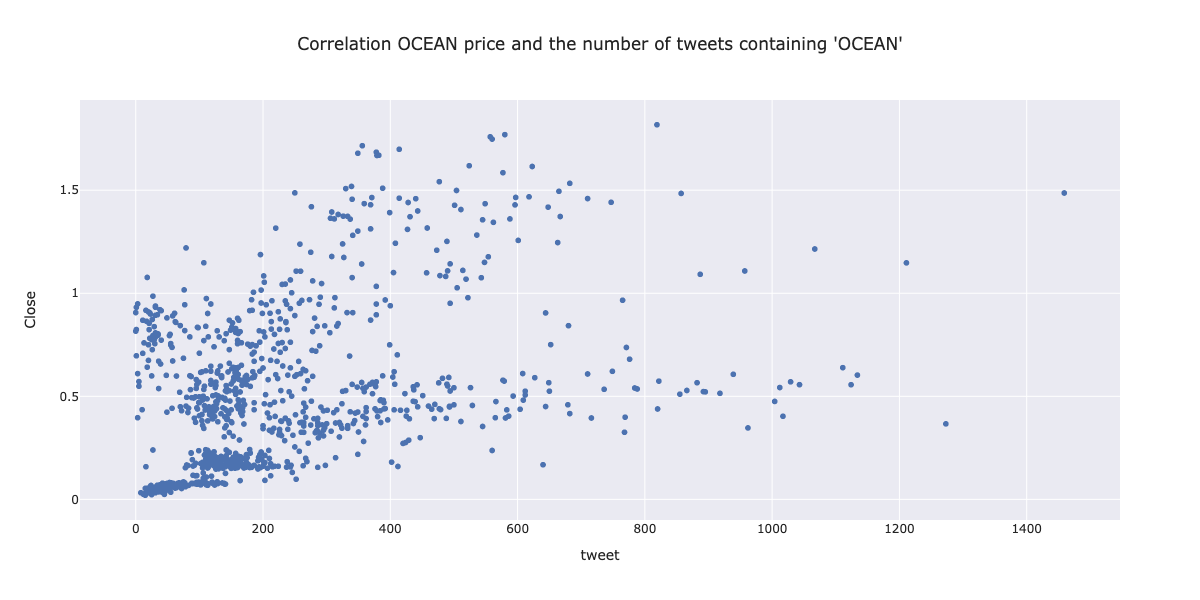

In [7]:
fig = px.scatter(df_merge, x="tweet", y="Close", title="Correlation OCEAN price and the number of tweets containing 'OCEAN'")
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(width=1200, height=600)
fig.show("png")

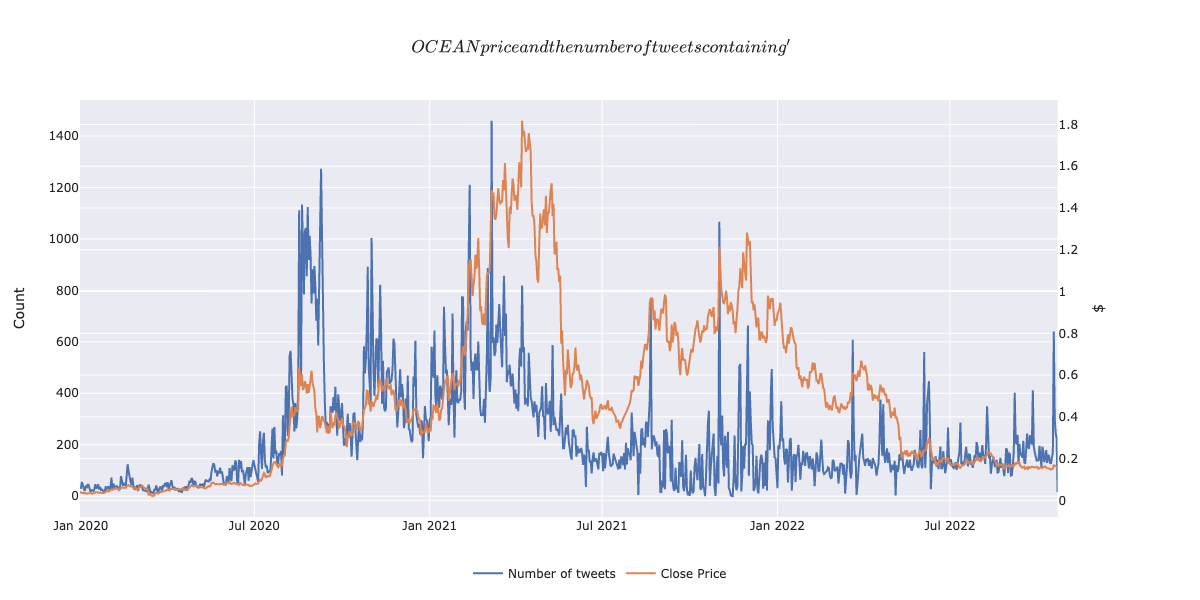

In [8]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="Number of tweets", x=df_merge["date"], y=df_merge["tweet"]), secondary_y=False)
fig.add_trace(go.Scatter(name="Close Price", x=df_merge["date"], y=df_merge["Close"]), secondary_y=True)

fig.update_yaxes(title_text='Count', secondary_y=False)
fig.update_yaxes(title_text='$', secondary_y=True)
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(title={'text':"$OCEAN price and the number of tweets containing '$OCEAN'"})
fig.update_layout(width=1200, height=600)
fig.show("png")

### 2. Correlation OCEAN price and the number of likes

In [9]:
df_merge['likes_count'].corr(df_merge['Close'])

0.5901864414897208

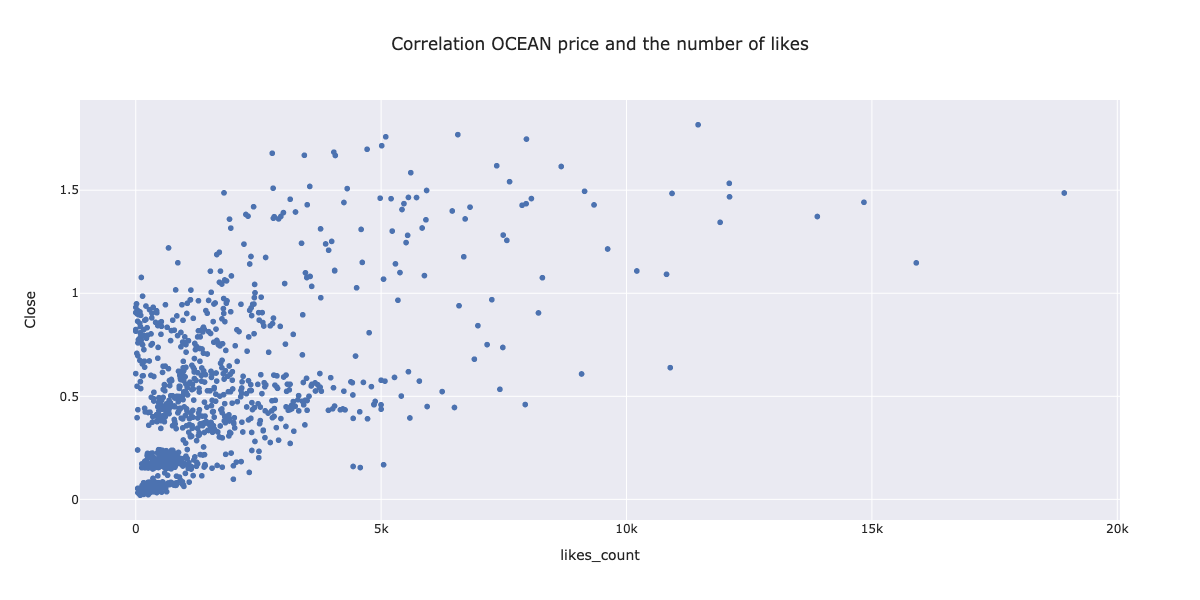

In [10]:
fig = px.scatter(df_merge, x="likes_count", y="Close", title="Correlation OCEAN price and the number of likes")
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(width=1200, height=600)
fig.show("png")

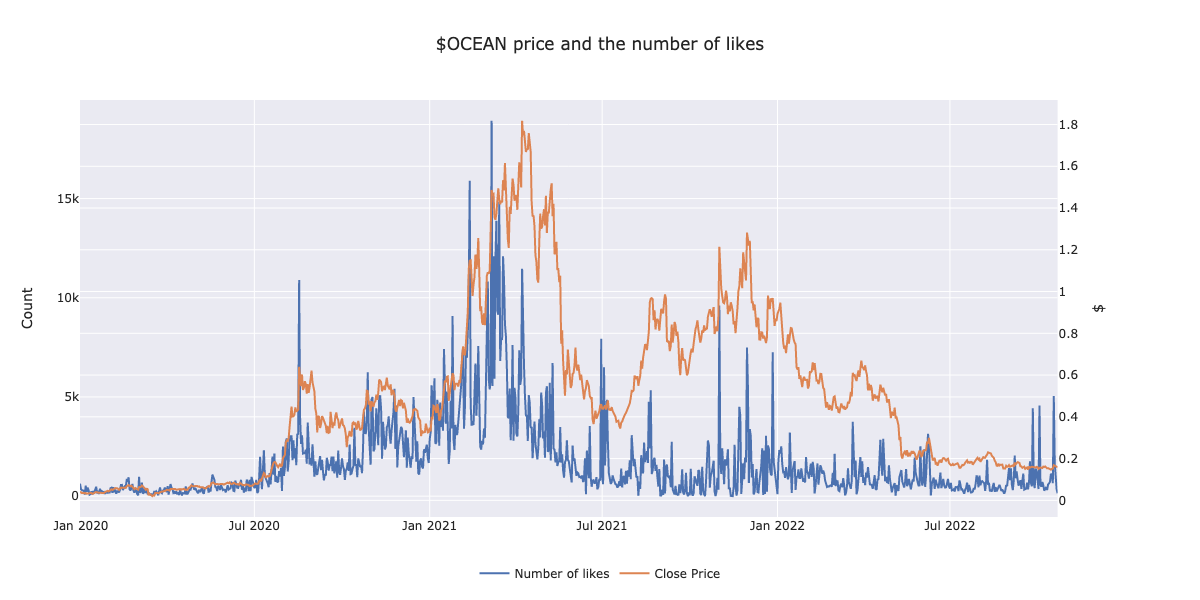

In [11]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="Number of likes", x=df_merge["date"], y=df_merge["likes_count"]), secondary_y=False)
fig.add_trace(go.Scatter(name="Close Price", x=df_merge["date"], y=df_merge["Close"]), secondary_y=True)

fig.update_yaxes(title_text='Count', secondary_y=False)
fig.update_yaxes(title_text='$', secondary_y=True)
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(title={'text':"$OCEAN price and the number of likes"})
fig.update_layout(width=1200, height=600)
fig.show("png")

### 3. Correlation OCEAN price and the number of retweets

In [12]:
df_merge['retweets_count'].corr(df_merge['Close'])

0.4850534999308635

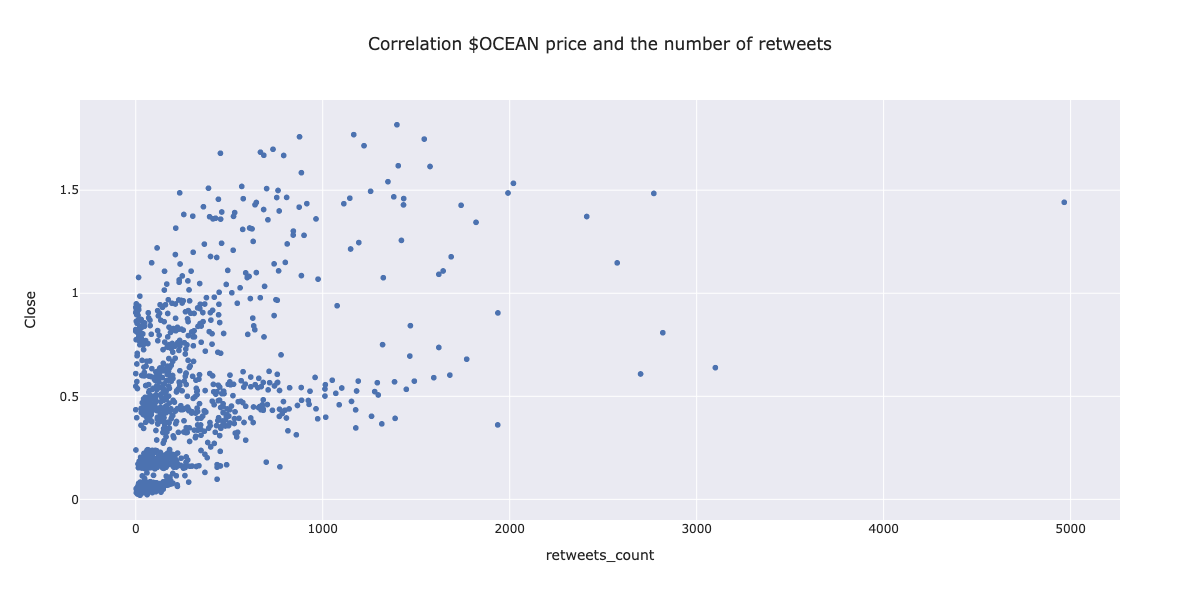

In [13]:
fig = px.scatter(df_merge, x="retweets_count", y="Close", title="Correlation $OCEAN price and the number of retweets")
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(width=1200, height=600)
fig.show("png")

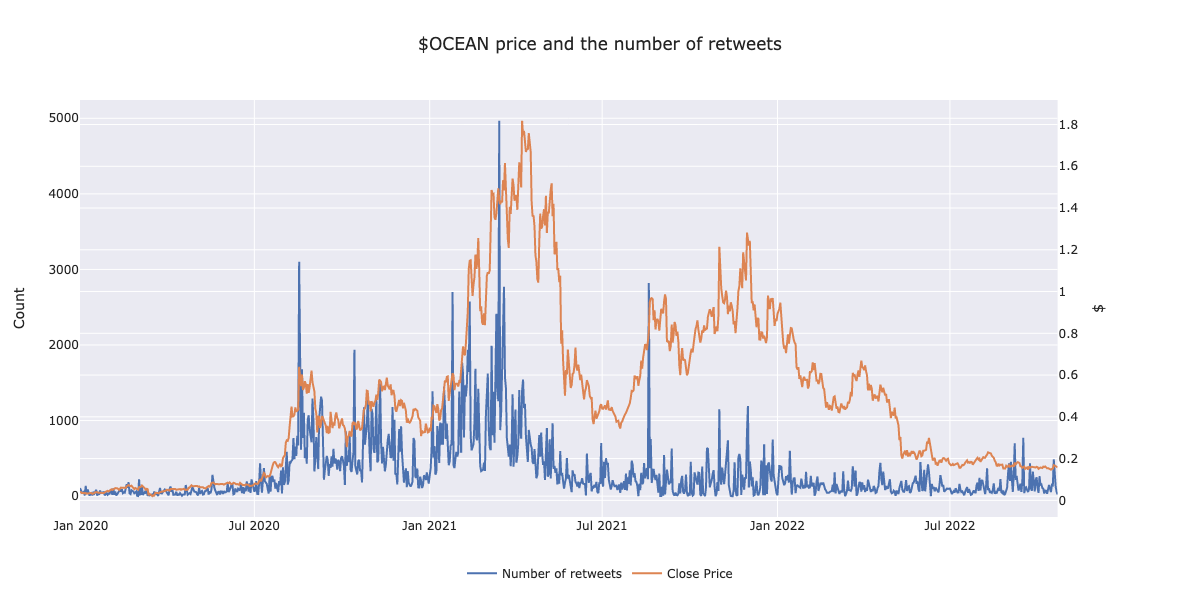

In [14]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="Number of retweets", x=df_merge["date"], y=df_merge["retweets_count"]), secondary_y=False)
fig.add_trace(go.Scatter(name="Close Price", x=df_merge["date"], y=df_merge["Close"]), secondary_y=True)

fig.update_yaxes(title_text='Count', secondary_y=False)
fig.update_yaxes(title_text='$', secondary_y=True)
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(title={'text':"$OCEAN price and the number of retweets"})
fig.update_layout(width=1200, height=600)
fig.show("png")

### 4. Correlation OCEAN price and the number of individuals tweeting

In [15]:
df_merge['user_id'].corr(df_merge['Close'])

0.49524667035850267

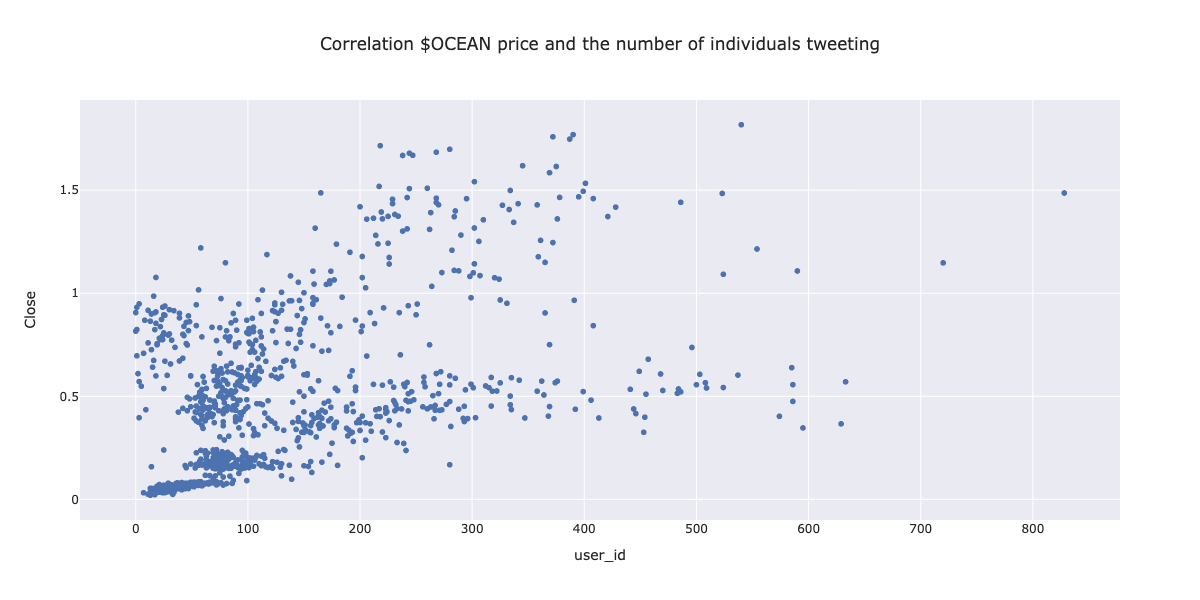

In [16]:
fig = px.scatter(df_merge, x="user_id", y="Close", title="Correlation $OCEAN price and the number of individuals tweeting")
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(width=1200, height=600)
fig.show("png")

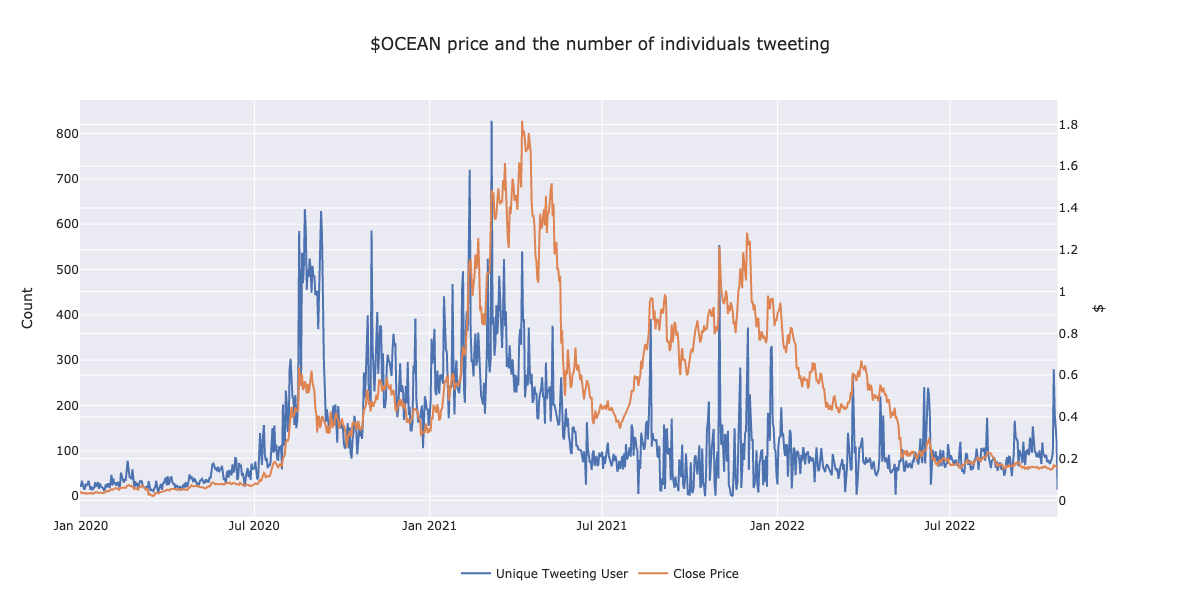

In [17]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="Unique Tweeting User", x=df_merge["date"], y=df_merge["user_id"]), secondary_y=False)
fig.add_trace(go.Scatter(name="Close Price", x=df_merge["date"], y=df_merge["Close"]), secondary_y=True)

fig.update_yaxes(title_text='Count', secondary_y=False)
fig.update_yaxes(title_text='$', secondary_y=True)
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(title={'text':'$OCEAN price and the number of individuals tweeting'})
fig.update_layout(width=1200, height=600)
fig.show("png")

### 5. Impact of influential tweets on OCEAN price
Determine an influential by using the quantile .8 on likes, replies, retweets count

In [18]:
replies_quantile  = df_tweet['replies_count'].quantile(0.8)
retweets_quantile = df_tweet['retweets_count'].quantile(0.8)
likes_quantile    = df_tweet['likes_count'].quantile(0.8)

df_tweet['influential'] = ((df_tweet['replies_count'] > replies_quantile) & (df_tweet['retweets_count'] > retweets_quantile) & (df_tweet['likes_count'] > likes_quantile)).astype(int)


In [19]:
df_tweet_grouped = df_tweet.groupby(pd.Grouper(key='date', freq='D')).agg({'influential': 'sum'})

In [20]:
df_merged = pd.merge(df_price, df_tweet_grouped, left_on='Date', right_on='date')

In [21]:
df_merged['Close'].corr(df_merged['influential'])

0.5676686042548623

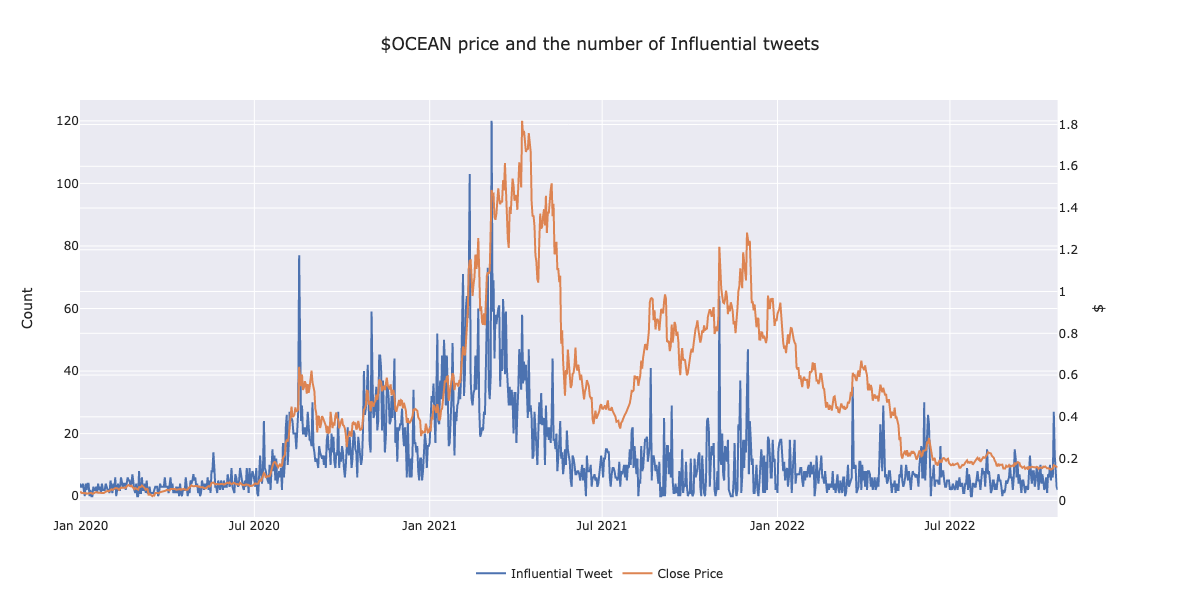

In [22]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="Influential Tweet", x=df_merged["Date"], y=df_merged["influential"]), secondary_y=False)
fig.add_trace(go.Scatter(name="Close Price", x=df_merged["Date"], y=df_merged["Close"]), secondary_y=True)

fig.update_yaxes(title_text='Count', secondary_y=False)
fig.update_yaxes(title_text='$', secondary_y=True)
fig.update_layout(legend = dict(orientation = 'h', xanchor = "center", x = 0.5, y= -0.1))
fig.update_layout(title={'text':'$OCEAN price and the number of Influential tweets'})
fig.update_layout(width=1200, height=600)
fig.show("png")

In [23]:
# Make sure the merged dataframe is sorted by date
df_merged.sort_values('Date', inplace=True)

# Perform the Granger causality test
gc_res = grangercausalitytests(df_merged[['Close', 'influential']], maxlag=7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3039  , p=0.5815  , df_denom=1023, df_num=1
ssr based chi2 test:   chi2=0.3048  , p=0.5809  , df=1
likelihood ratio test: chi2=0.3048  , p=0.5809  , df=1
parameter F test:         F=0.3039  , p=0.5815  , df_denom=1023, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7688  , p=0.4639  , df_denom=1020, df_num=2
ssr based chi2 test:   chi2=1.5451  , p=0.4618  , df=2
likelihood ratio test: chi2=1.5439  , p=0.4621  , df=2
parameter F test:         F=0.7688  , p=0.4639  , df_denom=1020, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5118  , p=0.6742  , df_denom=1017, df_num=3
ssr based chi2 test:   chi2=1.5460  , p=0.6717  , df=3
likelihood ratio test: chi2=1.5448  , p=0.6720  , df=3
parameter F test:         F=0.5118  , p=0.6742  , df_denom=1017, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4687  , p=0.

Confirmation of the Grager Causality test thanks to visual aids

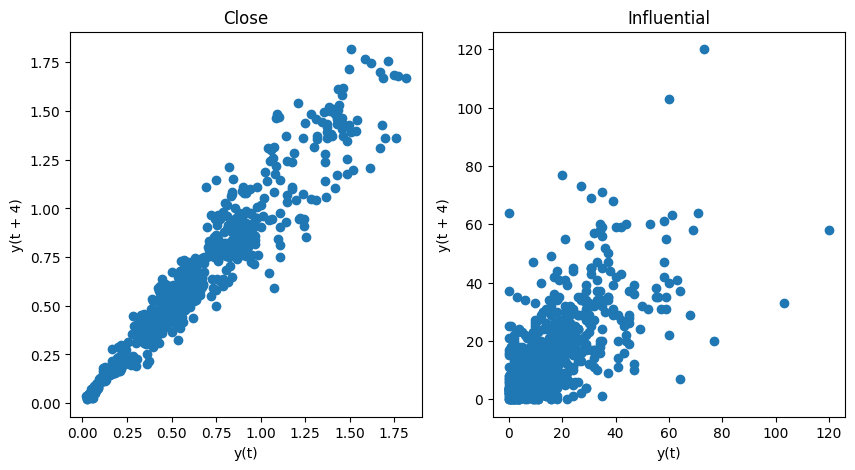

In [24]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

lag_plot(df_merged['Close'], ax=ax1, lag=4)
ax1.set_title('Close')

lag_plot(df_merged['influential'], ax=ax2, lag=4)
ax2.set_title('Influential')

plt.show()

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: influential does not Granger-cause Close: reject at 5% significance level. Test statistic: 2.469, critical value: 2.376>, p-value: 0.043>


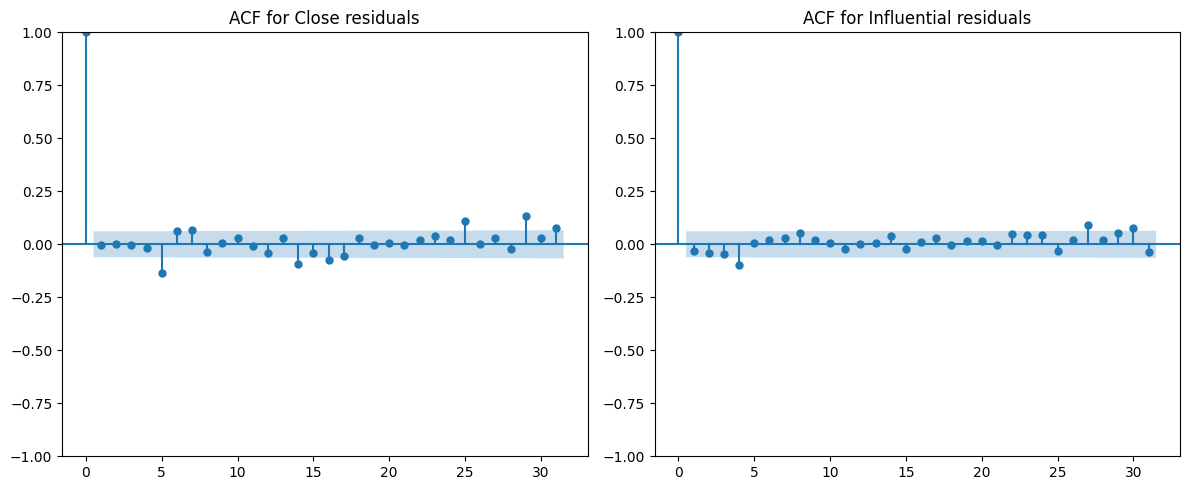

In [25]:
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf

model = VAR(df_merged[['Close', 'influential']])
results = model.fit(maxlags=4)

granger_test = results.test_causality('Close', 'influential', kind='f')
print(granger_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
residuals = results.resid
# Plot acf for 'Close'
plot_acf(residuals['Close'], ax=ax1, title='ACF for Close residuals')

# Plot acf for 'influential'
plot_acf(residuals['influential'], ax=ax2, title='ACF for Influential residuals')

plt.tight_layout()
plt.show()